In [2]:
!pip install kagglehub
!pip install kaggle
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [3]:
!pip install --upgrade openpyxl

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [4]:
%pip install --upgrade openpyxl
import openpyxl
print(openpyxl.__version__)



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
3.1.5


In [5]:
%pip install snorkel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importação das bibliotecas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from snorkel.labeling import LabelingFunction, LFApplier  # Corrigido import
from snorkel.labeling.model import LabelModel, MajorityLabelVoter
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, matthews_corrcoef
from sklearn.feature_extraction.text import TfidfVectorizer
from snorkel.labeling import LFAnalysis


Carregamento do dataset

In [13]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Carregar o dataset (supondo que já tenha sido carregado corretamente)
file_path_2 = "Airline_Reviews_Combined.xlsx"  # Ajuste conforme o nome correto do arquivo

# Carregar o dataset usando o KaggleHub (alternativa à leitura direta com pandas)
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rosemeenshaikh/a-z-airline-reviews",
  file_path_2,
)

# Exibir as primeiras 5 linhas para inspecionar os dados
print("Primeiros 5 registros:", df.head())



C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_14932\813170855.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Primeiros 5 registros:          Airline                                  Title          Author  \
0    AB Aviation                "pretty decent airline"      Tom Hansen   
1    AB Aviation                   "Not a good airline"   Gyan Fernando   
2    AB Aviation         "flight was fortunately short"   Gyan Fernando   
3  Adria Airways    "I will never fly again with Adria"  D Praetextatus   
4  Adria Airways  "it ruined our last days of holidays"        D Meijer   

          Country                 Date  Verified  \
0     Netherlands   11th November 2019      True   
1  United Kingdom       25th June 2019      True   
2  United Kingdom       25th June 2019      True   
3          Serbia  28th September 2019     False   
4     Netherlands  24th September 2019      True   

                                              Review Type Of Traveller  \
0  ✅Trip Verified|  Moroni to Moheli. Turned out ...      Solo Leisure   
1  ✅Trip Verified| Moroni to Anjouan. It is a ver...      Solo Le

Distribuição das avaliações por tipo de assento

In [14]:
!pip install matlplotlib

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement matlplotlib (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matlplotlib


In [15]:
import matplotlib.pyplot as plt


C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_14932\3902676915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seat Type', data=df, palette='Set2')


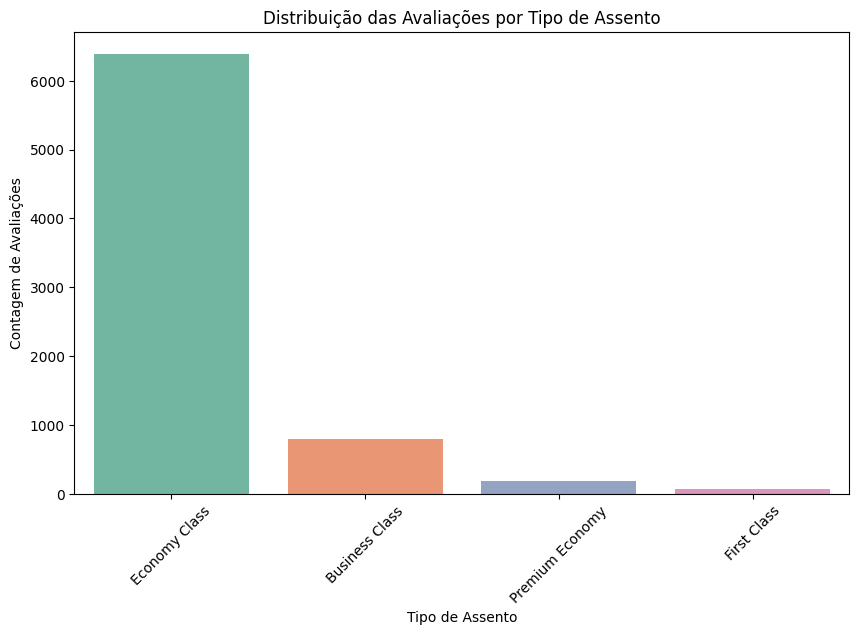

In [16]:
# Distribuição das avaliações por tipo de assento
plt.figure(figsize=(10, 6))
sns.countplot(x='Seat Type', data=df, palette='Set2')
plt.title('Distribuição das Avaliações por Tipo de Assento')
plt.xlabel('Tipo de Assento')
plt.ylabel('Contagem de Avaliações')
plt.xticks(rotation=45)
plt.show()


Relação entre o conforto do assento e o tipo de assento

C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_14932\15467082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seat Type', y='Seat Comfort', data=df, palette='Set2')


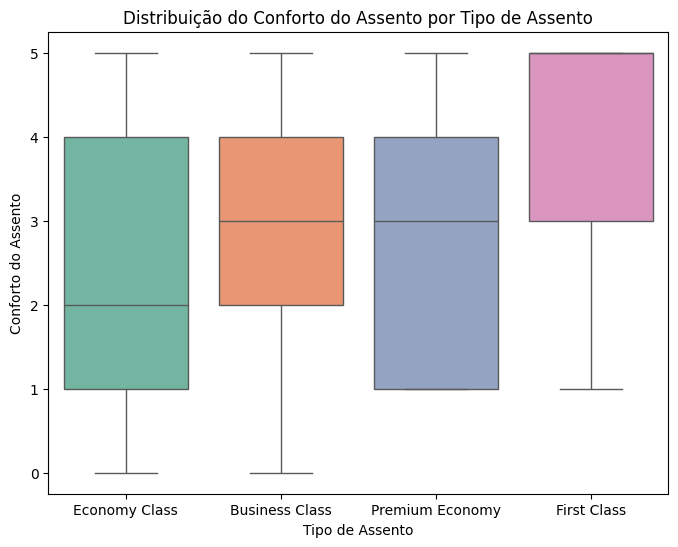

In [17]:
# Boxplot para visualizar a relação entre o conforto do assento e o tipo de assento
plt.figure(figsize=(8, 6))
sns.boxplot(x='Seat Type', y='Seat Comfort', data=df, palette='Set2')
plt.title('Distribuição do Conforto do Assento por Tipo de Assento')
plt.xlabel('Tipo de Assento')
plt.ylabel('Conforto do Assento')
plt.show()


Distribuição do serviço de tripulação

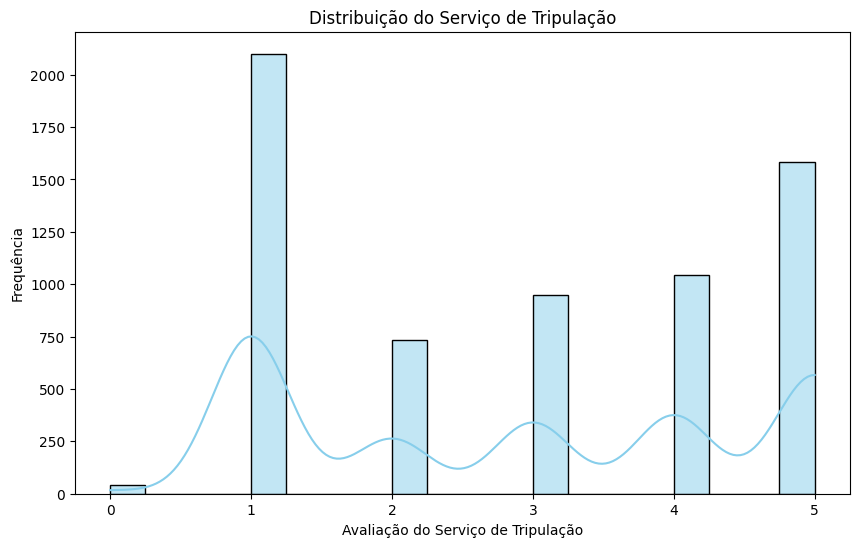

In [18]:
# Distribuição do serviço de tripulação
plt.figure(figsize=(10, 6))
sns.histplot(df['Cabin Staff Service'], kde=True, color='skyblue', bins=20)
plt.title('Distribuição do Serviço de Tripulação')
plt.xlabel('Avaliação do Serviço de Tripulação')
plt.ylabel('Frequência')
plt.show()


Tipo de viajante e avaliação geral

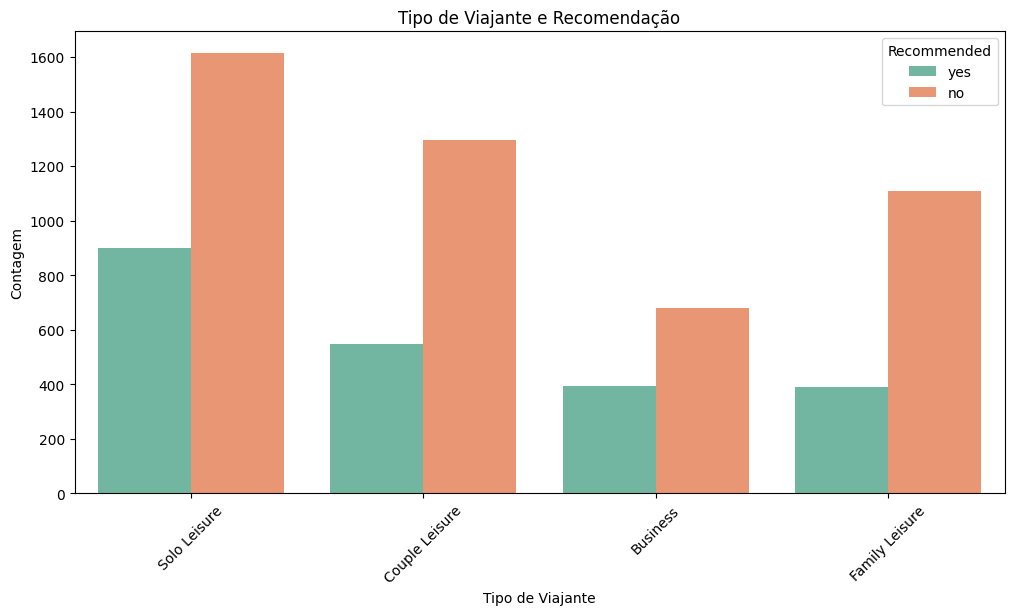

In [19]:
# Comparação do tipo de viajante e avaliação geral
plt.figure(figsize=(12, 6))
sns.countplot(x='Type Of Traveller', hue='Recommended', data=df, palette='Set2')
plt.title('Tipo de Viajante e Recomendação')
plt.xlabel('Tipo de Viajante')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


Avaliação de alimentação e bebidas

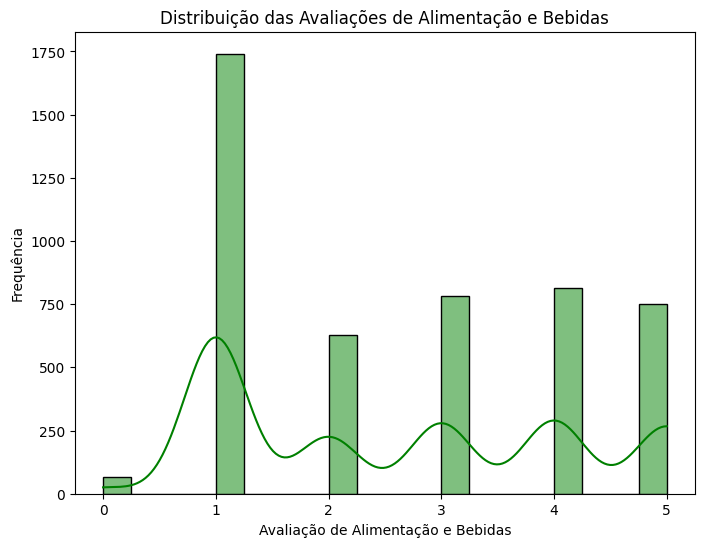

In [20]:
# Distribuição das avaliações de alimentação e bebidas
plt.figure(figsize=(8, 6))
sns.histplot(df['Food & Beverages'], kde=True, color='green', bins=20)
plt.title('Distribuição das Avaliações de Alimentação e Bebidas')
plt.xlabel('Avaliação de Alimentação e Bebidas')
plt.ylabel('Frequência')
plt.show()


Tipo de viajante e recomendação

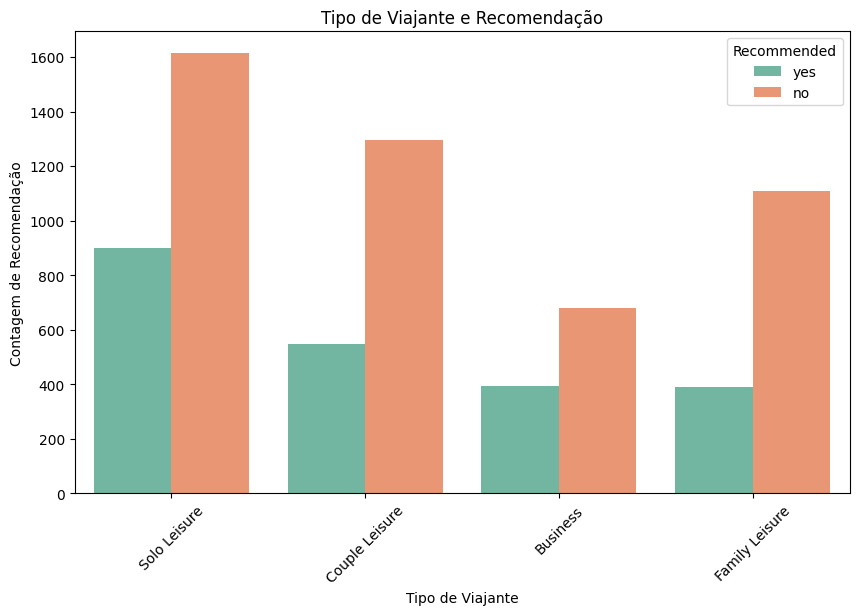

In [22]:
# Analisando recomendação por tipo de viajante
plt.figure(figsize=(10, 6))
sns.countplot(x='Type Of Traveller', hue='Recommended', data=df, palette='Set2')
plt.title('Tipo de Viajante e Recomendação')
plt.xlabel('Tipo de Viajante')
plt.ylabel('Contagem de Recomendação')
plt.xticks(rotation=45)
plt.show()


Comprimento das avaliações

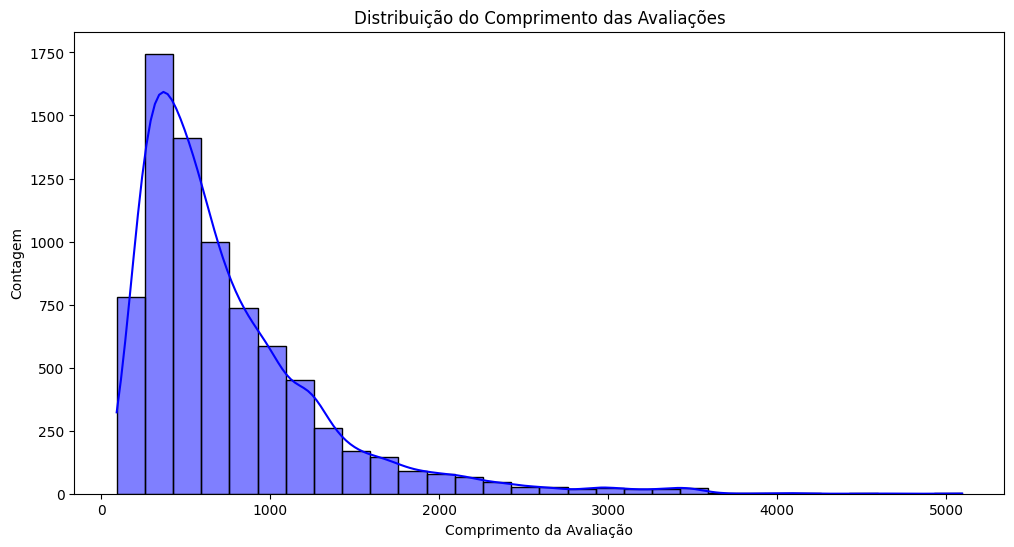

In [23]:
# Criando uma nova coluna para o comprimento de cada avaliação
df['Review Length'] = df['Review'].apply(len)

# Plotando a distribuição do comprimento das avaliações
plt.figure(figsize=(12, 6))
sns.histplot(df['Review Length'], bins=30, kde=True, color='blue')
plt.title('Distribuição do Comprimento das Avaliações')
plt.xlabel('Comprimento da Avaliação')
plt.ylabel('Contagem')
plt.show()


Palavras mais usadas

C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_14932\4294333998.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=df_common, palette="viridis")


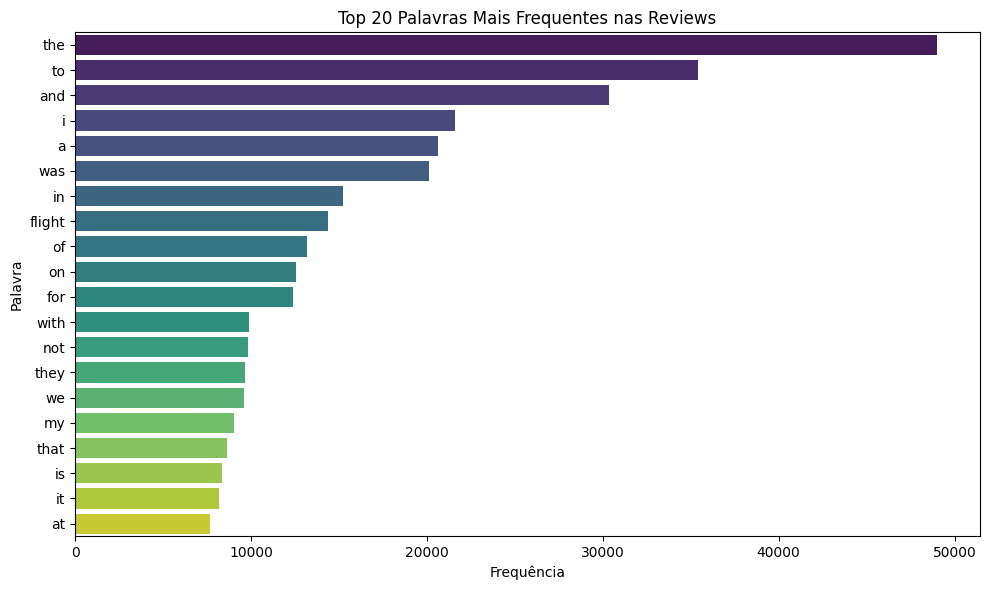

In [35]:


# 2) Tokenização simples: extrai sequências alfanuméricas
df["tokens"] = (
    df["Review"]
    .str.lower()
    .str.findall(r"\b\w+\b")
)

# 3) Contar todas as palavras
all_words = [w for tokens in df["tokens"] for w in tokens]
word_counts = Counter(all_words)

# 4) Selecionar as top 20
top_n = 20
common = word_counts.most_common(top_n)
df_common = pd.DataFrame(common, columns=["word", "count"])

# 5) Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="word", data=df_common, palette="viridis")
plt.title(f"Top {top_n} Palavras Mais Frequentes nas Reviews")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.tight_layout()
plt.show()


Uso de Emois e Tags HTML

C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_14932\2600616134.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="feature", y="count", data=prop_df, ax=axes[0], palette="pastel")
C:\Users\Alan de Castro\AppData\Local\Temp\ipykernel_14932\2600616134.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="feature", y="prop", data=prop_df, ax=axes[1], palette="pastel")


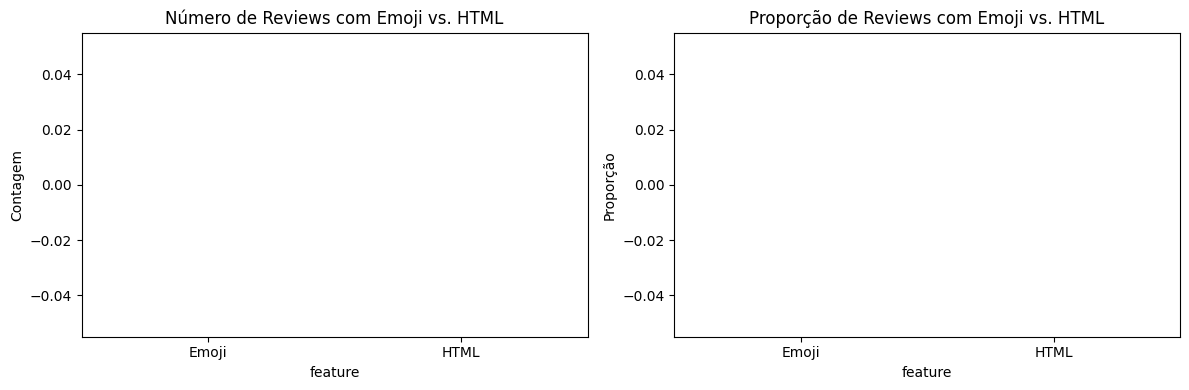

In [42]:
# === Detecção de Emojis e Tags HTML ===

import re

# Regex para blocos Unicode típicos de emojis
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # símbolos e pictogramas
    u"\U0001F680-\U0001F6FF"  # transporte e mapas
    u"\U0001F1E0-\U0001F1FF"  # bandeiras
    "]+",
    flags=re.UNICODE,
)

# Regex para detectar tags HTML
html_pattern = re.compile(r"<[^>]+>")

# Criar flags
df["has_emoji"] = df["Review"].apply(lambda x: bool(emoji_pattern.search(x)))
df["has_html"]  = df["Review"].apply(lambda x: bool(html_pattern.search(x)))

# Estatísticas
total = len(df)
emoji_count = df["has_emoji"].sum()
html_count  = df["has_html"].sum()

# Plot de barras
prop_df = pd.DataFrame({
    "feature": ["Emoji", "HTML"],
    "count":   [emoji_count, html_count],
    "prop":    [emoji_count/total, html_count/total]
})

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x="feature", y="count", data=prop_df, ax=axes[0], palette="pastel")
axes[0].set_title("Número de Reviews com Emoji vs. HTML")
axes[0].set_ylabel("Contagem")

sns.barplot(x="feature", y="prop", data=prop_df, ax=axes[1], palette="pastel")
axes[1].set_title("Proporção de Reviews com Emoji vs. HTML")
axes[1].set_ylabel("Proporção")

plt.tight_layout()
plt.show()


In [24]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Definição das funções de etiquetagem (LFs)

In [27]:
# Definir os rótulos para positivo e negativo
POSITIVE = 1
NEGATIVE = 0
ABSTAIN = -1  # Abstém-se se não puder classificar com confiança

# Funções de Etiquetagem (LFs)

# LF1: Verificar palavras-chave positivas
def lf_positive_keywords(review):
    positive_keywords = ['good', 'excellent', 'great', 'love', 'best', 'amazing', 'outstanding']
    return POSITIVE if any(word in review.lower() for word in positive_keywords) else ABSTAIN

# LF2: Verificar palavras-chave negativas
def lf_negative_keywords(review):
    negative_keywords = ['bad', 'poor', 'hate', 'worst', 'awful', 'terrible', 'disappointed']
    return NEGATIVE if any(word in review.lower() for word in negative_keywords) else ABSTAIN

sentiment_model = pipeline(
    "sentiment-analysis",                              # <- task
    model="cardiffnlp/twitter-roberta-base-sentiment-latest",  # <- modelo
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

def lf_sentiment_model(review):
    try:
        # Truncar a entrada se o comprimento exceder 512 tokens
        result = sentiment_model(review[:512])  # Truncando para o limite de 512 tokens
        label = result[0]['label'].lower()
        if label == 'positive':
            return POSITIVE
        elif label == 'negative':
            return NEGATIVE
        else:
            return ABSTAIN
    except:
        return ABSTAIN  # Em caso de erro, abstém-se da classificação

# Criando funções de etiquetagem como instâncias de LabelingFunction
lf_positive_keywords = LabelingFunction(name="positive_keywords", f=lf_positive_keywords)
lf_negative_keywords = LabelingFunction(name="negative_keywords", f=lf_negative_keywords)
lf_sentiment_model = LabelingFunction(name="sentiment_model", f=lf_sentiment_model)

# Lista de LFs
lfs = [lf_positive_keywords, lf_negative_keywords, lf_sentiment_model]


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

c:\Users\Alan de Castro\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Alan de Castro\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment-latest. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Aplicação das LFs no dataset e Análise de Desempenho

In [28]:
# Aplicar as funções de etiquetagem (LFs) ao dataset
lfa = LFApplier(lfs)  # Usando LFApplier em vez de PandasLFApplier
labels = lfa.apply(df['Review'])

# Análise de Desempenho das LFs
analysis = LFAnalysis(L=labels, lfs=lfs).lf_summary()
print("Análise de desempenho das LFs:", analysis)


7730it [43:12,  2.98it/s] 


Análise de desempenho das LFs:                    j Polarity  Coverage  Overlaps  Conflicts
positive_keywords  0      [1]  0.330789  0.289909   0.124580
negative_keywords  1      [0]  0.336740  0.312937   0.094825
sentiment_model    2   [0, 1]  0.834411  0.504269   0.120828


Construção do modelo de rótulos para agregação de ruído

In [29]:
# Construir o modelo de rótulos para agregação de ruído
label_model = LabelModel(cardinality=2)  # Removido o argumento 'ignore_index'

# Ajuste do modelo de rótulos com os rótulos probabilísticos
label_model.fit(labels)

# Obter os rótulos probabilísticos gerados pelo modelo de rótulos
probabilistic_labels = label_model.predict_proba(labels)

# Adicionar os rótulos probabilísticos ao dataframe
df['probabilistic_label'] = probabilistic_labels[:, 1]  # Probabilidade de ser positivo

# Exibir as primeiras 5 linhas com os rótulos probabilísticos
print("Primeiros 5 registros com rótulos probabilísticos:", df[['Review', 'probabilistic_label']].head())


INFO:root:Computing O...
INFO:root:Estimating \mu...
  1%|          | 1/100 [00:00<00:28,  3.47epoch/s]INFO:root:[10 epochs]: TRAIN:[loss=0.090]
INFO:root:[20 epochs]: TRAIN:[loss=0.034]
INFO:root:[30 epochs]: TRAIN:[loss=0.016]
INFO:root:[40 epochs]: TRAIN:[loss=0.009]
INFO:root:[50 epochs]: TRAIN:[loss=0.005]
 51%|█████     | 51/100 [00:00<00:00, 168.01epoch/s]INFO:root:[60 epochs]: TRAIN:[loss=0.003]
INFO:root:[70 epochs]: TRAIN:[loss=0.002]
INFO:root:[80 epochs]: TRAIN:[loss=0.002]
INFO:root:[90 epochs]: TRAIN:[loss=0.001]
100%|██████████| 100/100 [00:00<00:00, 207.23epoch/s]
INFO:root:Finished Training


Primeiros 5 registros com rótulos probabilísticos:                                               Review  probabilistic_label
0  ✅Trip Verified|  Moroni to Moheli. Turned out ...             0.999836
1  ✅Trip Verified| Moroni to Anjouan. It is a ver...             0.934842
2  ✅Trip Verified|  Anjouan to Dzaoudzi. A very s...             0.500000
3  Not Verified|  Please do a favor yourself and ...             0.166876
4  ✅Trip Verified| Do not book a flight with this...             0.166876


Pré-processamento de Texto com TF-IDF

In [30]:
# Pré-processamento de Texto com TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limitar para 5000 features
X_tfidf = vectorizer.fit_transform(df['Review'])


Divisão dos dados em treino e teste

In [31]:
# Definir y (rótulos) binários a partir das probabilidades
y = (df['probabilistic_label'] > 0.5).astype(int)  # Converter probabilidades para rótulos binários

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Treinamento do modelo RandomForest e avaliação

In [32]:
# Exemplo de modelo de Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)

# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

# Calcular e exibir o Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       905
           1       0.92      0.93      0.93       641

    accuracy                           0.94      1546
   macro avg       0.94      0.94      0.94      1546
weighted avg       0.94      0.94      0.94      1546

MCC: 0.8736500462869342


Comparação com MajorityLabelVoter

In [33]:
# Comparação com MajorityLabelVoter
from snorkel.labeling.model.baselines import MajorityLabelVoter

# Usar MajorityLabelVoter para obter rótulos com base na votação majoritária
majority_model = MajorityLabelVoter(cardinality=2)  # Defina o número de classes

# Obter as predições para o conjunto de rótulos
majority_pred = majority_model.predict(L=labels)  # Aplicando no conjunto de rótulos

# Assegurando que as predições correspondem ao tamanho de y_test
majority_pred_test = majority_pred[:len(y_test)]  # Ajustando o tamanho

# Calcular o Matthews Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, majority_pred_test)
print("MCC do Majority Label Voter:", mcc)


MCC do Majority Label Voter: -0.007911254541626604
